In [4]:
!pip install wordcloud

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [7]:
# Load datasets
train_df = pd.read_csv("twitter_training.csv", header=None)
val_df = pd.read_csv("twitter_validation.csv", header=None)

# Combine them
df = pd.concat([train_df, val_df], ignore_index=True)
df.columns = ['Tweet_ID', 'Entity', 'Sentiment', 'Content']
df

,Tweet_ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
75677,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75678,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
75680,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [8]:
print(df['Sentiment'].value_counts())
print(df['Entity'].value_counts())
df.info()

Sentiment
Negative      22808
Positive      21109
Neutral       18603
Irrelevant    13162
Name: count, dtype: int64
Entity
TomClancysRainbowSix                 2435
LeagueOfLegends                      2431
MaddenNFL                            2429
Microsoft                            2428
CallOfDuty                           2425
Verizon                              2414
ApexLegends                          2412
Facebook                             2403
CallOfDutyBlackopsColdWar            2403
WorldOfCraft                         2394
Dota2                                2391
FIFA                                 2378
NBA2K                                2373
Battlefield                          2372
TomClancysGhostRecon                 2368
johnson&johnson                      2367
Overwatch                            2366
Xbox(Xseries)                        2360
Amazon                               2350
PlayStation5(PS5)                    2343
GrandTheftAuto(GTA)                  

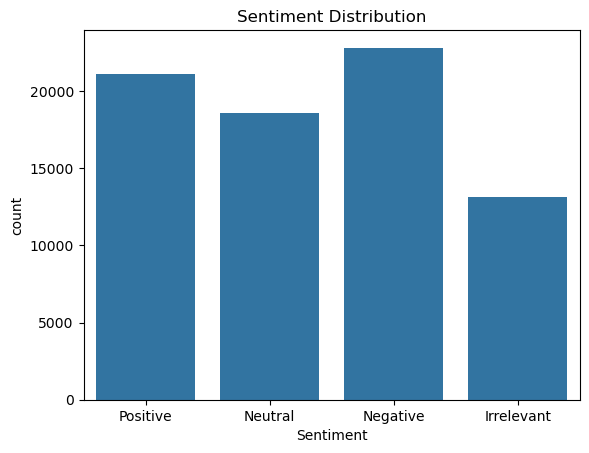

In [9]:
sns.countplot(data=df, x='Sentiment')
plt.title('Sentiment Distribution')
plt.show()

In [10]:
# Make sure stopwords are downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r"http\S+|@\S+|#\S+", "", text)  # Remove URLs, mentions, hashtags
        text = re.sub(r"[^a-zA-Z\s]", "", text)        # Remove special characters
        text = text.lower()                            # Lowercase
        text = " ".join(word for word in text.split() if word not in stop_words)
        return text
    else:
        return ""

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dreasty\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [11]:
df['Cleaned_Content'] = df['Content'].apply(clean_text)

# Visualize sentiment distribution

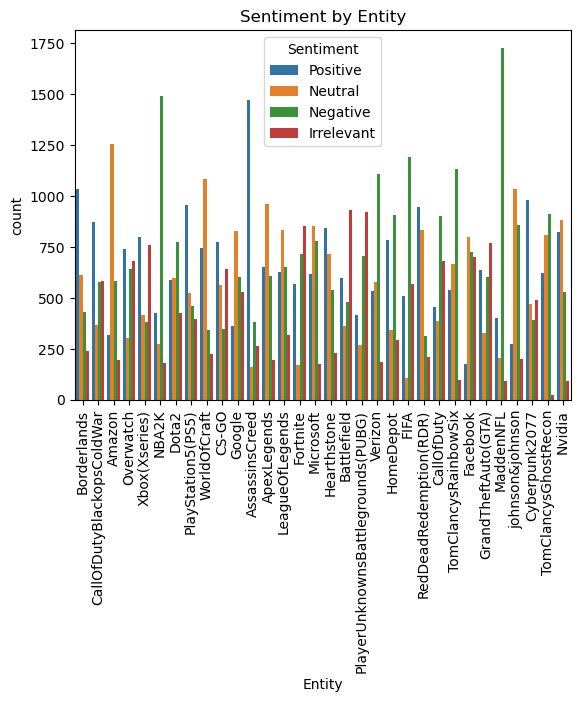

In [12]:
sns.countplot(data=df, x='Entity', hue='Sentiment')
plt.xticks(rotation=90)
plt.title('Sentiment by Entity')
plt.show()